In [3]:
import os

from dotenv import load_dotenv
import pandas as pd
from sqlalchemy import create_engine
import numpy as np

from recommender.read_db import ReadDatabase
from recommender.preprocess import SetUpDataframes

In [20]:
#dotenv_path = os.path.join(os.path.dirname(__file__), '.env')
load_dotenv('.env')

DB_URI = os.environ.get("DB_URI")
engine = create_engine(DB_URI)

reader = ReadDatabase(engine, 'CM_BD')

feedback_df = reader.get_data('user_id, post_id, value, created_at', 'posts_feedback', None)
#feedback_df = feedback_df[feedback_df['created_at']>pd.to_datetime('2019-10-01')]
feedback_matrix = SetUpDataframes.feedback_matrix(feedback_df)

----------------------------------------------------------------------
reading columns user_id, post_id, value, created_at from table posts_feedback from database CM_BD


In [21]:
feedback_matrix

user_id,9,11,12,14,16,18,20,21,22,24,27,32,33,35,37,40,41,42,43,44,45,46,47,49,50,53,56,57,58,60,62,64,65,66,68,69,70,72,73,75,76,77,80,81,...,38111,38113,38114,38117,38119,38120,38121,38122,38123,38124,38126,38132,38141,38147,38149,38150,38152,38154,38157,38158,38159,38160,38162,38163,38164,38165,38166,38168,38169,38170,38174,38176,38179,38182,38185,38186,38188,38189,38193,38195,38205,38207,38208,38209
post_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
feedback_matrix.count().sum()/(385*18974)

0.007571126038502449

In [24]:
feedback_matrix.count()

user_id
9        21
11        4
12        5
14        2
16        7
         ..
38195     1
38205     1
38207     1
38208     1
38209     1
Length: 18981, dtype: int64

In [3]:
response_score_df = reader.get_data('response, value, question_id', 'posts_questionresponse', None)

----------------------------------------------------------------------
reading columns response, value, question_id from table posts_questionresponse from database CM_BD


In [4]:
responses_df = reader.get_data('user_id, response, question_id', 'posts_response', None)
responses_df = responses_df.drop_duplicates().reset_index(drop=True)

----------------------------------------------------------------------
reading columns user_id, response, question_id from table posts_response from database CM_BD


In [29]:
feedback_df = reader.get_data('user_id, post_id, value', 'posts_feedback', None)

----------------------------------------------------------------------
reading columns user_id, post_id, value from table posts_feedback from database CM_BD


In [30]:
feedback_df

,user_id,post_id,value
0,1311,1,4
1,5,9,5
2,4,11,2
3,1311,10,5
4,354,6,5
...,...,...,...
55358,14117,352,5
55359,2377,418,5
55360,19521,403,5
55361,4075,408,5


In [5]:
question_ids = sorted(response_score_df['question_id'].unique())

In [6]:
question_responses = response_score_df.groupby('question_id')

In [9]:
question_responses.get_group(100)

,response,value,question_id
997,Lo haremos después,0,100
998,Aún no,1,100
999,Solo algunos,2,100
1000,Sí pudo,4,100


In [10]:
from spacy.lang.es import Spanish

In [11]:
import unicodedata

In [20]:
def strip_accents_lower(text):

    try:
        text = unicode(text, 'utf-8')
    except NameError: # unicode is a default on python 3 
        pass

    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")

    return str(text).lower()

In [24]:
response_score_df['response'] = response_score_df['response'].apply(strip_accents_lower)

In [25]:
responses_df['response'] = responses_df['response'].apply(strip_accents_lower)

In [28]:
responses_df[responses_df['question_id']==100]['response'].unique()

array(['solo algunos', 'si', 'aun no la realizamos', 'si pudo', 'aun no',
       'lo haremos despues', '4'], dtype=object)

In [27]:
response_score_df[response_score_df['question_id']==100]

,response,value,question_id
997,lo haremos despues,0,100
998,aun no,1,100
999,solo algunos,2,100
1000,si pudo,4,100


In [110]:
def response_to_score(row):
    try:
        return response_score_df[
            (response_score_df['question_id'] == row['question_id']) 
        ]
    except IndexError:
        return np.nan

In [78]:
response_to_score(responses_df.loc[1003])

,response,value,question_id
941,Lo haremos después,0,54
942,Aún no,1,54
943,Con dificultad,2,54
944,Sí con ayuda,3,54
945,Sí lo logró,4,54


In [39]:
responses_df['score'] = responses_df.apply(response_to_score, axis=1)

KeyError: ('value', 'occurred at index 0')

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

#matplotlib inline

/Users/pedroiMac/anaconda3/envs/recommender/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/pedroiMac/anaconda3/envs/recommender/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/pedroiMac/anaconda3/envs/recommender/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [28]:
feedback_df

,user_id,post_id,value,created_at
0,1311,1,4,2019-02-04 14:38:39.567494
1,5,9,5,2019-02-04 18:15:41.576189
2,4,11,2,2019-02-04 18:41:27.414911
3,1311,10,5,2019-02-04 22:08:56.706318
4,354,6,5,2019-02-05 18:19:01.813125
...,...,...,...,...
55474,38208,221,5,2019-10-29 00:18:31.953630
55475,13892,303,5,2019-10-29 00:21:13.795622
55476,38209,371,5,2019-10-29 00:21:35.075382
55477,3555,441,5,2019-10-29 00:22:01.683013


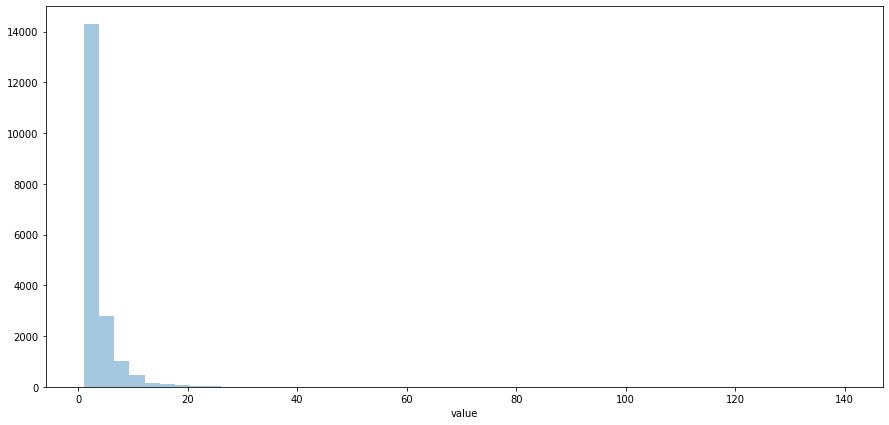

In [29]:
fig = plt.figure(figsize=(15,7))
sns.distplot(feedback_df.groupby('user_id').count()['value'], kde=False)

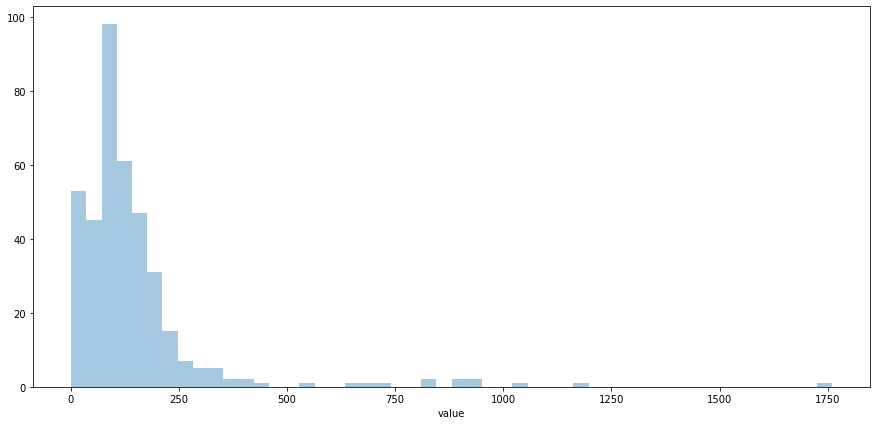

In [31]:
fig = plt.figure(figsize=(15,7))
sns.distplot(feedback_df.groupby('post_id').count()['value'], kde=False)

In [32]:
from app import feedback_matrix

----------------------------------------------------------------------
reading columns user_id, post_id, value from table posts_feedback from database CM_DB


ProgrammingError: (pymysql.err.ProgrammingError) (1146, "Table 'CM_DB.posts_feedback' doesn't exist")
[SQL: SELECT user_id, post_id, value FROM CM_DB.posts_feedback]
(Background on this error at: http://sqlalche.me/e/f405)

In [2]:
feedback_matrix

NameError: name 'feedback_matrix' is not defined

In [ ]:
from 